In [2]:
# Importing Dependencies
import numpy as np
import matplotlib.pyplot as plt

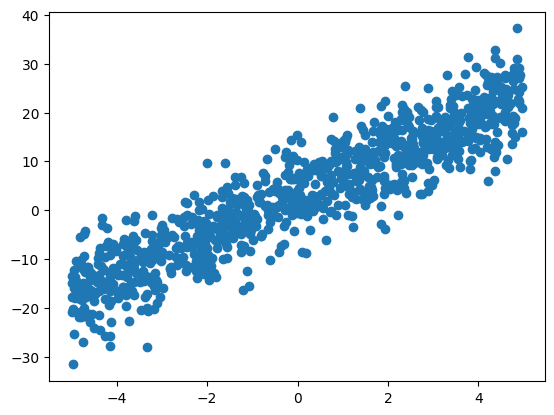

In [3]:
# Generate Random Data
n = 1000
X = 10* np.random.random(n) - 5
Y = 4*X + 3 + np.random.normal(loc = 0, scale = 5, size = n)

plt.figure()
plt.scatter(
    X,
    Y
)

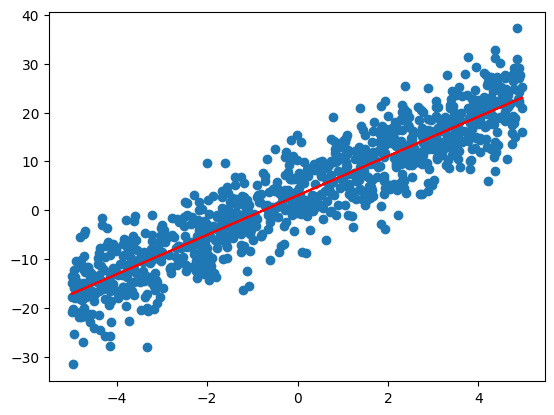

In [4]:
#CLOSED FORM SOLUTION
x=np.matrix(X)
x=x.T

X_b=np.c_[np.ones((len(X),1)),x]
Y_b=np.matrix(Y)
Y_b=Y_b.T

theta=np.linalg.inv((X_b.T*X_b))*X_b.T*Y_b

plt.figure()

y_predicted=X_b*theta
plt.scatter(X,Y)
plt.plot(X,y_predicted,c='red')
plt.show()


[[2.61327135]
 [4.03831648]]


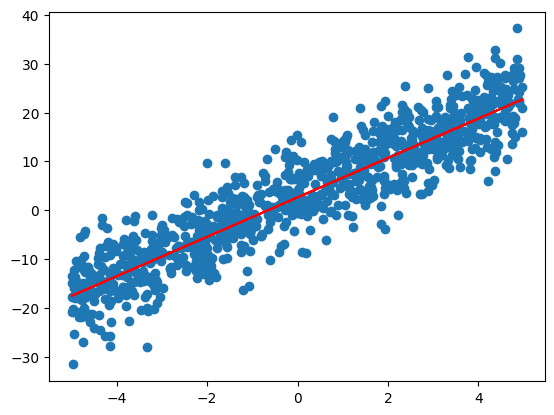

In [36]:
#BATCH GRADIENT DESCENT
l=.005
tol=.1
theta=np.random.rand(2,1)
theta_actual=np.matrix([[2.70950739],
        [4.0564678 ]])


while(abs(np.linalg.norm(theta-theta_actual))>tol):
  gradients = 2/1000 * X_b.T.dot(X_b.dot(theta) - Y_b)
  theta = theta - l * gradients


print(theta)

plt.figure()

y_predicted=X_b*theta
plt.scatter(X,Y)
plt.plot(X,y_predicted,c='red')
plt.show()

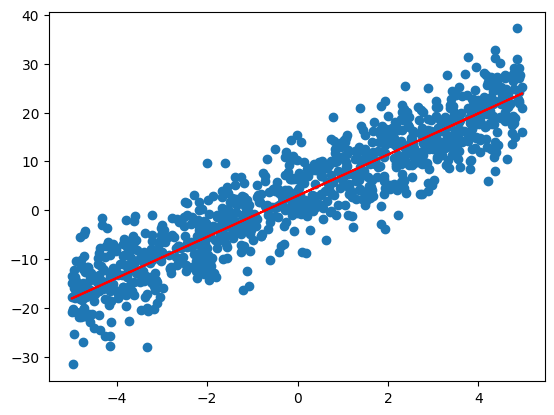

In [34]:
#STOCHASTIC GRADIENT
n_epochs = 50
m=100
t0, t1 = 5, 50
def learning_schedule(t):
 return t0 / (t + t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
 for i in range(m):
  random_index = np.random.randint(m)
  xi = X_b[random_index:random_index+1]
  yi = Y_b[random_index:random_index+1]
  gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
  eta = learning_schedule(epoch * m + i)
  theta = theta - eta * gradients
y_predicted=X_b*theta
plt.scatter(X,Y)
plt.plot(X,y_predicted,c='red')
plt.show()
